# Perkenalan
MILESTONE 1

Nama: Ayman Baswedan

Batch: HCK-22

Objective: Ingin menganalisis penjualan game sebelum membuka toko


Link Visualisasi: https://public.tableau.com/app/profile/ayman.baswedan/viz/VisualisasiMilestone1/DashboardM1Ayman?publish=yes

# Identifikasi Masalah
Background : sebelum membuka toko game saya ingin menganalisis game apa dan platfrom apa yang paling laris agar bisa menghindari overstock

Topik permasalahan :  

- Spesific: Ingin menganalisis game dan platfrom mana yang memiliki penjualan tertinggi 

- Measureable: Target yang ingin dicapai adalah menyelesaikan minimal 80% analisis sebelum toko dibuka

- Achievable: Untuk menentukan game dan platfrom apa sebelum di stock , saya akan lakukan analisis data penjualan selama satu tahun terakhir

- Relevant: Dengan memahami pola penjualan game, saya bisa membuat keputusan yang lebih tepat mengenai game dan paltfrom apa yang perlu di-stock

- Time-bound: Analisis ini akan dilakukan dalam waktu 1 bulan sebelum toko resmi dibuka



Problem statement : Sebelum membuka toko game, penting untuk menganalisis jenis game dan platform yang memiliki penjualan tertinggi. Analisis ini bertujuan untuk menentukan game dan platform apa yang memiliki penjualana terbanyak berdasarkan data penjualan, Target yang ingin dicapai adalah menyelesaikan minimal 80% analisis sebelum toko dibuka, dengan waktu analisis yang dijadwalkan selama 1 bulan.




1 - 10 platfrom game apa yang paling banyak terjual

2 - 10 game apa yang memiliki global sales terbanyak

3 - 10 game apa yang paling laris di eropa

4 - 5 platfrom apa yang paling laris di tahun 2006

5 - 5 game apa yang paling laku di tahun 2006

6 - membandingkan penjualan PS2 di jepang dan di eropa (jawab menggunakan statistik deskriptif)

7 - membandingkan penjualan PS3 dan Xbox 360 pada global sales (jawab menggunakan statistik inferensial)


# Data Loading

In [2]:
import pandas as pd

# Load dataset nya
data = pd.read_csv('vgsales.csv')

# Menampilkan beberapa kolom dari datasetnya
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Langkah selanjutnya adalah mengganti nama kolom-kolom agar memudahkan analisis dan mengganti tipe data di kolom year dari float ke integer

# Data Cleaning

In [3]:
import pandas as pd

# Mengubah tipe data di kolom 'Year' menjadi integer, dan mengisi missing value menjadi 0 karena merubah tipe data ke integer
data['Year'] = data['Year'].fillna(0).astype(int)

# Mengganti nama kolom agar lebih mudah untuk menganalisis
data = data.rename(columns={
    'NA_Sales': 'America_sales',
    'EU_Sales': 'Europe_sales',
    'JP_Sales': 'Japan_sales',
})

data

,Rank,Name,Platform,Year,Genre,Publisher,America_sales,Europe_sales,Japan_sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Analisis dan Perhitungan

1. 10 platfrom game apa yang paling banyak terjual

In [4]:
# Membuat variable untuk menyortir 10 platform dengan penjualan terbanyak
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Memanggil variable
platform_sales

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
Name: Global_Sales, dtype: float64

2. 10  Game apa yang memiliki global sales terbanyak

In [5]:
# Membuat variable untuk menyortir 10 game yang paling banyak terjual di global sales
top_10_game = data[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

# Memanggil nama variable
top_10_game

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


3. 10 Game apa yang paling laris di Eropa

In [6]:
# Membuat variable untuk menyortir 10 game yang paling laris di eropa
top_10_europe = data[['Name', 'Europe_sales']].sort_values(by='Europe_sales', ascending=False).head(10)

# Memanggil variable
top_10_europe

,Name,Europe_sales
0,Wii Sports,29.02
2,Mario Kart Wii,12.88
3,Wii Sports Resort,11.01
10,Nintendogs,11.00
16,Grand Theft Auto V,9.27
19,Brain Age: Train Your Brain in Minutes a Day,9.26
6,New Super Mario Bros.,9.23
7,Wii Play,9.20
4,Pokemon Red/Pokemon Blue,8.89
14,Wii Fit Plus,8.59


4. 5 Platform apa yang paling laris di tahun 2006

In [7]:
# Membuat variable dan slicing untuk mengambil data sales khusus di tahun 2006
sales_2006 = data[data['Year'] == 2006]

# Membuat variable untuk menentukan 5 platform apa yang paling laris di tahun 2006
top_5_2006 = sales_2006.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# Memanggil variable
top_5_2006

Platform
Wii     137.91
DS      121.15
PS2     103.42
PSP      55.85
X360     51.88
Name: Global_Sales, dtype: float64

5. 5 Game apa yang paling laku di tahun 2006 

In [8]:
# Membuat variable untuk menampilkan 5 game yang paling laris di 2006 dan menggunakan nama variable sebelumnya untuk slicing data sales khusus di tahun 2006
top_5_games_2006 = sales_2006[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(5)

# Memanggil variable
top_5_games_2006

,Name,Global_Sales
0,Wii Sports,82.74
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
20,Pokemon Diamond/Pokemon Pearl,18.36
100,The Legend of Zelda: Twilight Princess,7.31


6. Membandingkan penjualan PS2 di Jepang dan di Eropa (statistik deskriptif)

In [9]:
ps2_sales = data[data['Platform'] == 'PS2'][['Japan_sales', 'Europe_sales']]

ps2_sales_japan = ps2_sales['Japan_sales'].describe()

ps2_sales_europe = ps2_sales['Europe_sales'].describe()

ps2_sales_japan, ps2_sales_europe

(count    2161.000000
 mean        0.064415
 std         0.198542
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.030000
 max         3.610000
 Name: Japan_sales, dtype: float64,
 count    2161.000000
 mean        0.157006
 std         0.361596
 min         0.000000
 25%         0.010000
 50%         0.050000
 75%         0.150000
 max         5.490000
 Name: Europe_sales, dtype: float64)

7. Membandingkan penjualan PS3 dan Xbox 360 pada global sales (statistik inferensial)

In [10]:
from scipy import stats

# Slicing data untuk PS3 dan Xbox 360
ps3_sales = data[data['Platform'] == 'PS3']['Global_Sales']
xbox_sales = data[data['Platform'] == 'X360']['Global_Sales']

# Melakukan t-test untuk melihat apakah ada perbedaan yang signifikan
t_stat, p_value = stats.ttest_ind(ps3_sales, xbox_sales, equal_var=False)

# Menampilkan hasil analisis
print(f'Hasil T-test {t_stat}')
print(f'Hasil p-value {p_value}')

Hasil T-test -0.902448170573608
Hasil p-value 0.3669055394574152


### Visualisasi Data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set background berwarna putih untuk visualisasi
sns.set(style="whitegrid")

1. 10 Platform game apa yang paling banyak terjual

C:\Users\ayman\AppData\Local\Temp\ipykernel_22360\2264151665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.values, y=platform_sales.index, palette="viridis")


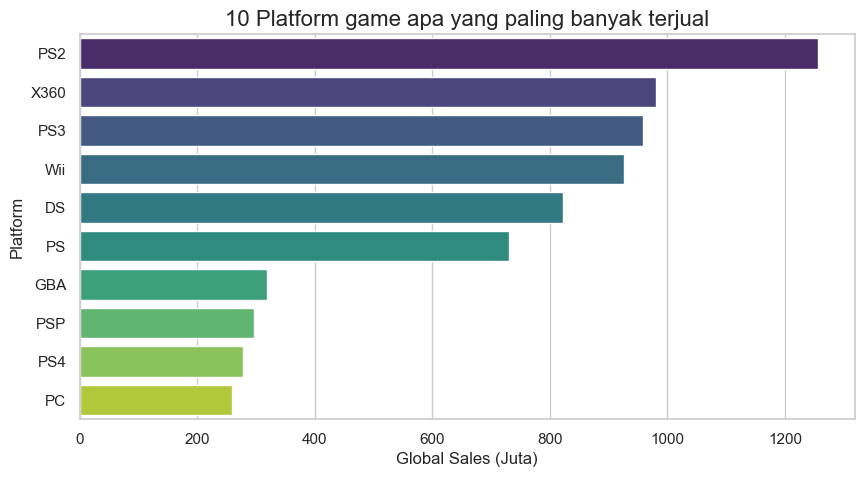

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette="viridis")
plt.title('10 Platform game apa yang paling banyak terjual', fontsize=16)
plt.xlabel('Global Sales (Juta)')
plt.ylabel('Platform')
plt.show()

insight: Platform terlaris adalah Playstation 2,
penjualan nya mencapai 1.2 Miliar unit di global sales

2. 10 Game apa yang memiliki global sales terbanyak

C:\Users\ayman\AppData\Local\Temp\ipykernel_22360\1624958139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_game['Global_Sales'], y=top_10_game['Name'], palette="rocket")


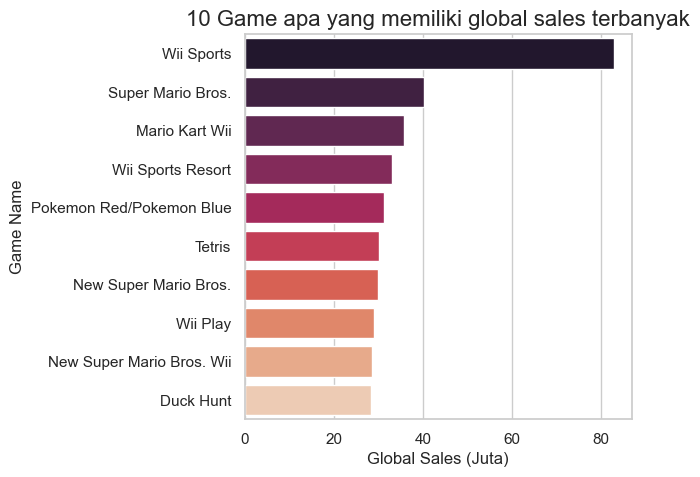

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=top_10_game['Global_Sales'], y=top_10_game['Name'], palette="rocket")
plt.title('10 Game apa yang memiliki global sales terbanyak', fontsize=16)
plt.xlabel('Global Sales (Juta)')
plt.ylabel('Game Name')
plt.show()

insight: Game dengan penjualan global terbanyak adalah Wii Sports, dengan penjualan mencapai 80+ juta unit

3. 10 Game apa yang paling laris di Eropa

C:\Users\ayman\AppData\Local\Temp\ipykernel_22360\956012855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_europe['Europe_sales'], y=top_10_europe['Name'], palette="magma")


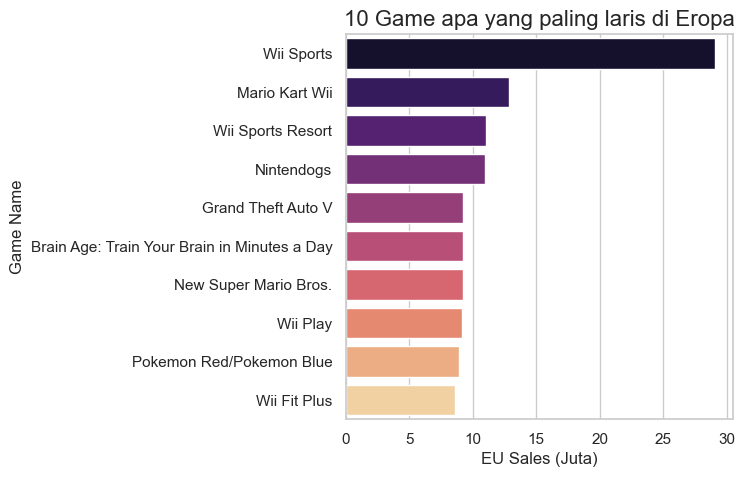

In [ ]:
plt.figure(figsize=(15,20))
sns.barplot(x=top_10_europe['Europe_sales'], y=top_10_europe['Name'], palette="magma")
plt.title('10 Game apa yang paling laris di Eropa', fontsize=16)
plt.xlabel('EU Sales (Juta)')
plt.ylabel('Game Name')
plt.show()


insight: Game dengan penjualan terlaris di eropa adalah Wii Sports, dengan penjualan mendekati 30 juta unit

4. 5 Platform apa yang paling laris di tahun 2006

C:\Users\ayman\AppData\Local\Temp\ipykernel_22360\823149063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_2006.values, y=top_5_2006.index, palette="cubehelix")


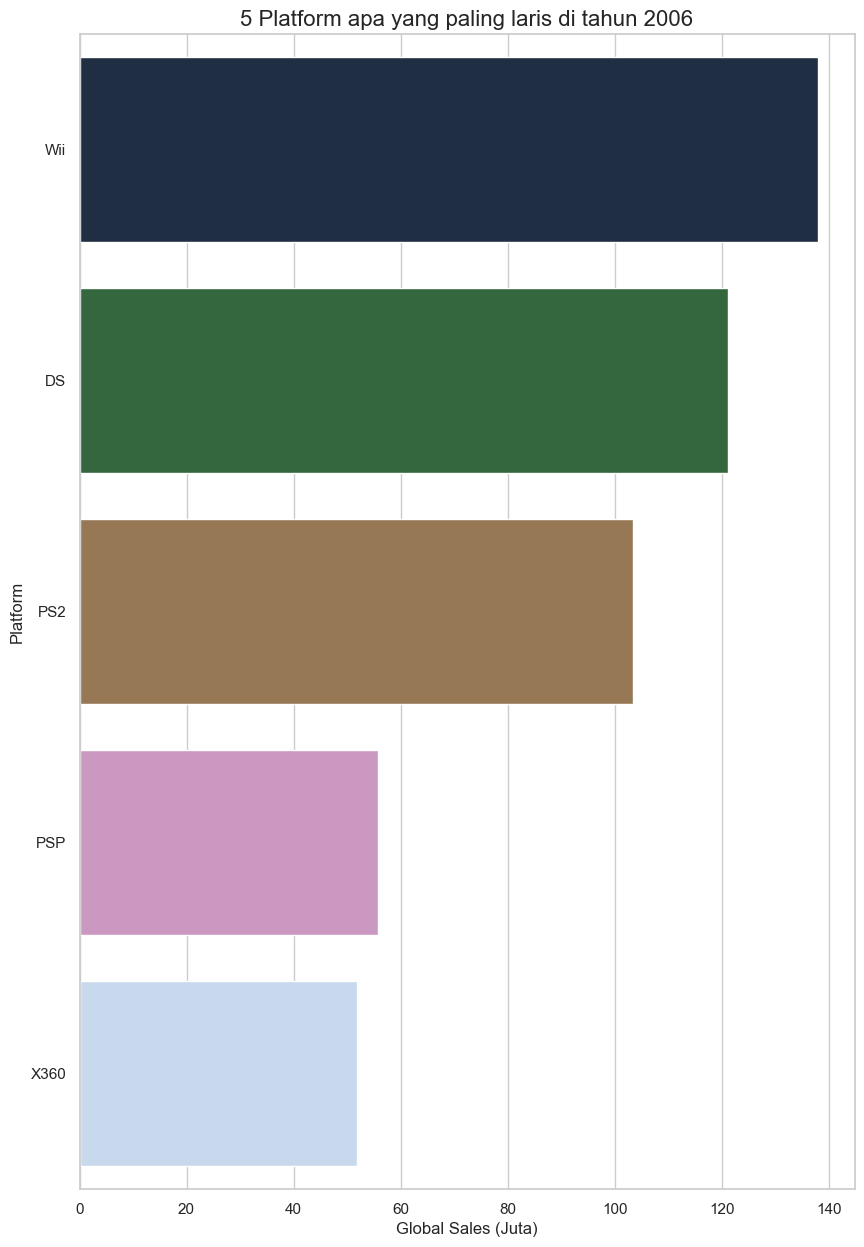

In [24]:
plt.figure(figsize=(10,15))
sns.barplot(x=top_5_2006.values, y=top_5_2006.index, palette="cubehelix")
plt.title('5 Platform apa yang paling laris di tahun 2006', fontsize=16)
plt.xlabel('Global Sales (Juta)')
plt.ylabel('Platform')
plt.show()


insight: Platform dengan global sales tertinggi, adalah Wii dengan penjualan mendekati 140 juta unit

5. 5 Game apa yang paling laku di tahun 2006

C:\Users\ayman\AppData\Local\Temp\ipykernel_22360\1639807129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_games_2006['Global_Sales'], y=top_5_games_2006['Name'], palette="coolwarm")


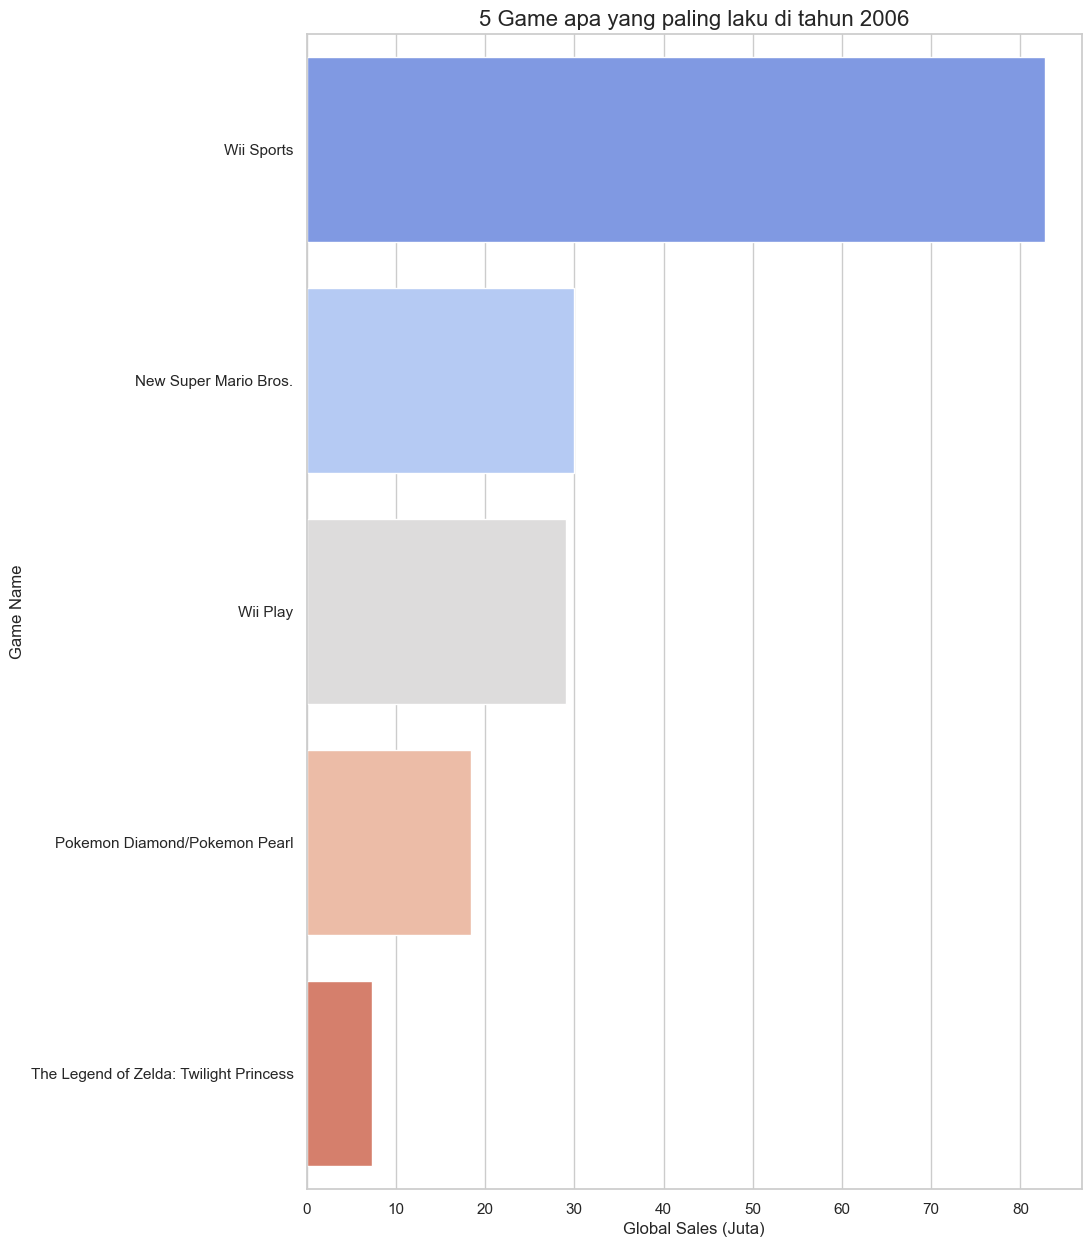

In [26]:
plt.figure(figsize=(10,15))
sns.barplot(x=top_5_games_2006['Global_Sales'], y=top_5_games_2006['Name'], palette="coolwarm")
plt.title('5 Game apa yang paling laku di tahun 2006', fontsize=16)
plt.xlabel('Global Sales (Juta)')
plt.ylabel('Game Name')
plt.show()

insight: Game dengan penjualan tertinggi di tahun 2006 adalah, Wii Sports dengan penjualan mencapai 80+ juta unit

6. Membandingkan penjualan PS2 di Jepang dan di Eropa

C:\Users\ayman\AppData\Local\Temp\ipykernel_22360\3757735441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Japan_sales', 'Europe_sales'], y=[ps2_sales['Japan_sales'].sum(), ps2_sales['Europe_sales'].sum()], palette="Set2")


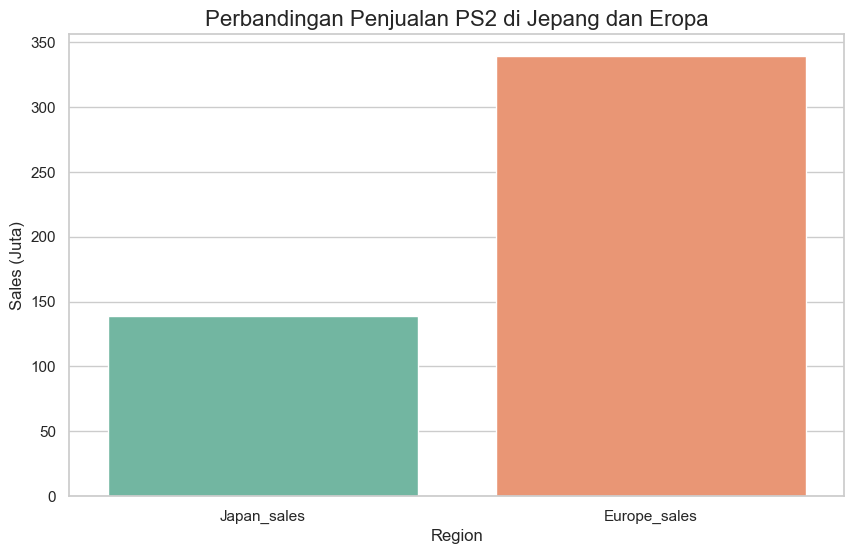

In [28]:
# Atur ukuran plot
plt.figure(figsize=(10, 6))

# Plot bar chart dengan nilai total penjualan PS2 di Jepang dan Eropa
sns.barplot(x=['Japan_sales', 'Europe_sales'], y=[ps2_sales['Japan_sales'].sum(), ps2_sales['Europe_sales'].sum()], palette="Set2")

# Judul dan label
plt.title('Perbandingan Penjualan PS2 di Jepang dan Eropa', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales (Juta)', fontsize=12)

# Tampilkan visualisasi
plt.show()

insight:
1. Penjualan PS2 di Eropa tampaknya memiliki distribusi yang lebih besar, dengan beberapa game yang terjual sangat baik

2. Distribusi penjualan yang lebih sempit di Jepang mungkin mengindikasikan pasar yang lebih stabil atau kurang variatif.

7. Membandingkan penjualan PS3 dan Xbox 360 pada global sales

C:\Users\ayman\AppData\Local\Temp\ipykernel_22360\628989657.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Total Sales (Juta)', data=sales_df, palette="Spectral")


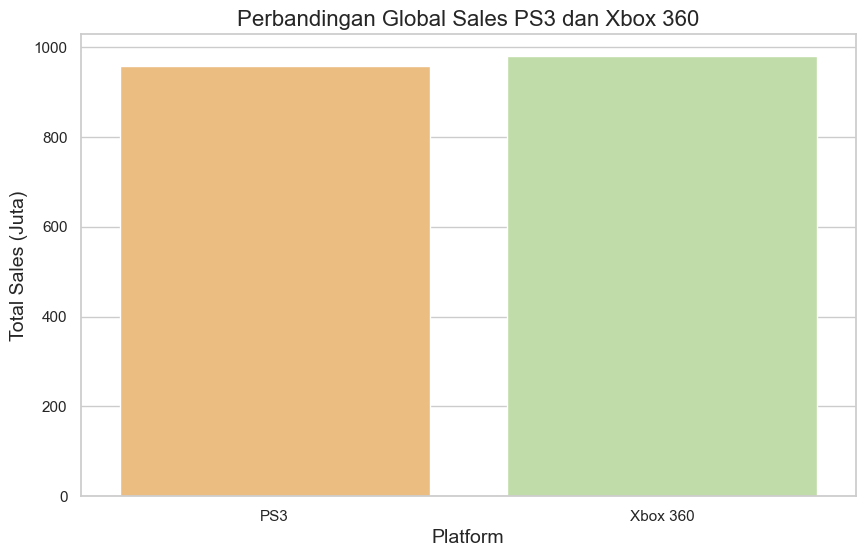

In [30]:
# Membersihkan data dari Missing value
ps3_sales_clean = data[data['Platform'] == 'PS3']['Global_Sales'].dropna()
xbox_sales_clean = data[data['Platform'] == 'X360']['Global_Sales'].dropna()

# Menghitung total penjualan untuk masing-masing platform
ps3_total_sales = ps3_sales_clean.sum()
xbox_total_sales = xbox_sales_clean.sum()

# Membuat DataFrame untuk visualisasi
sales_data = {
    'Platform': ['PS3', 'Xbox 360'],
    'Total Sales (Juta)': [ps3_total_sales, xbox_total_sales]
}

sales_df = pd.DataFrame(sales_data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Total Sales (Juta)', data=sales_df, palette="Spectral")

# Judul dan label
plt.title('Perbandingan Global Sales PS3 dan Xbox 360', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Sales (Juta)', fontsize=14)

# Tampilkan plot
plt.show()

insight: tidak ada perbedaan yang signifikan dari penjualan kedua platform ini

# Pengambilan Kesimpulan

1. 10 Platform Game Terlaris:

Platform yang paling banyak terjual secara global didominasi oleh konsol klasik seperti PS2 dan Wii, dengan PS2 menempati peringkat tertinggi.

2. 10 Game dengan Global Sales Tertinggi:

Wii Sports menempati peringkat teratas sebagai game dengan penjualan global tertinggi. 

3. 10  Game Paling Laris di Eropa:

Game seperti Grand Theft Auto V dan FIFA mendominasi penjualan di Eropa, berarti gamer Eropa lebih menyukai genre game action dan sport

4. 5 Platform Terlaris di Tahun 2006:

platform seperti Wii dan Xbox 360 menunjukkan performa penjualan yang sangat baik

5. 5 Game Paling Laku di Tahun 2006:

Game yang paling laris di tahun 2006 adalah Wii Sports, yang sangat memanfaatkan kesuksesan Nintendo Wii.

6. Perbandingan Penjualan PS2 di Jepang dan Eropa:

Penjualan PS2 di Eropa secara umum lebih tinggi dibandingkan dengan di Jepang. Distribusi penjualan di Eropa lebih bervariasi, dengan beberapa game terjual jauh lebih baik daripada yang lain

sementara di Jepang, penjualannya lebih konsisten tetapi dengan volume yang sedikit lebih rendah.

7. Perbandingan Penjualan PS3 dan Xbox 360 di Global Sales:

Berdasarkan uji statistik inferensial, tidak ada perbedaan yang signifikan antara penjualan global PS3 dan Xbox 360. Kedua konsol memiliki performa penjualan yang relatif seimbang secara global.